In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# !pip install arff
# import arff
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from google.colab import drive

In [2]:
drive.mount('/gdrive')
%cd /gdrive/MyDrive/F21DL_CW2/Data/CSV

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/F21DL_CW2/Data/CSV


In [3]:
%ls

x_test_gr_smpl.csv   y_test_smpl_4.csv  y_test_smpl.csv     y_train_smpl_5.csv
x_train_gr_smpl.csv  y_test_smpl_5.csv  y_train_smpl_0.csv  y_train_smpl_6.csv
y_test_smpl_0.csv    y_test_smpl_6.csv  y_train_smpl_1.csv  y_train_smpl_7.csv
y_test_smpl_1.csv    y_test_smpl_7.csv  y_train_smpl_2.csv  y_train_smpl_8.csv
y_test_smpl_2.csv    y_test_smpl_8.csv  y_train_smpl_3.csv  y_train_smpl_9.csv
y_test_smpl_3.csv    y_test_smpl_9.csv  y_train_smpl_4.csv  y_train_smpl.csv


In [4]:
X_train = pd.read_csv('x_train_gr_smpl.csv')
X_test = pd.read_csv('x_test_gr_smpl.csv')

X = pd.concat([X_train, X_test]).reset_index().drop(columns = ['index'])

y_train = pd.read_csv('y_train_smpl.csv')
y_test = pd.read_csv('y_test_smpl.csv')

y = pd.concat([y_train, y_test]).reset_index().drop(columns = ['index'])

X_train_4000, X_test_4000, y_train_4000, y_test_4000 = train_test_split(X, y, test_size=0.55, random_state=42, stratify = y)
X_train_9000, X_test_9000, y_train_9000, y_test_9000 = train_test_split(X, y, test_size=0.95, random_state=42, stratify = y)

y_train_0 = pd.read_csv('y_train_smpl_0.csv')
y_test_0 = pd.read_csv('y_test_smpl_0.csv')

y_train_1 = pd.read_csv('y_train_smpl_1.csv')
y_test_1 = pd.read_csv('y_test_smpl_1.csv')

y_train_2 = pd.read_csv('y_train_smpl_2.csv')
y_test_2 = pd.read_csv('y_test_smpl_2.csv')

y_train_3 = pd.read_csv('y_train_smpl_3.csv')
y_test_3 = pd.read_csv('y_test_smpl_3.csv')

y_train_4 = pd.read_csv('y_train_smpl_4.csv')
y_test_4 = pd.read_csv('y_test_smpl_4.csv')

y_train_5 = pd.read_csv('y_train_smpl_5.csv')
y_test_5 = pd.read_csv('y_test_smpl_5.csv')

y_train_6 = pd.read_csv('y_train_smpl_6.csv')
y_test_6 = pd.read_csv('y_test_smpl_6.csv')

y_train_7 = pd.read_csv('y_train_smpl_7.csv')
y_test_7 = pd.read_csv('y_test_smpl_7.csv')

y_train_8 = pd.read_csv('y_train_smpl_8.csv')
y_test_8 = pd.read_csv('y_test_smpl_8.csv')

y_train_9 = pd.read_csv('y_train_smpl_9.csv')
y_test_9 = pd.read_csv('y_test_smpl_9.csv')

In [5]:
import sys
print(sys.version)

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [6]:
# tf.reshape(np.array(X_train), shape = (9690, 48, 48))

In [7]:
model_basic = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (2304, )),
    tf.keras.layers.Dense(2056, activation = 'relu'),
    tf.keras.layers.Dense(1028, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model_basic.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model_basic.fit(x=X_train,y=y_train,epochs=300)

Epoch 1/300
303/303 [==============================] - 1s 4ms/step - loss: 21.7913 - accuracy: 0.3717
Epoch 2/300
303/303 [==============================] - 1s 4ms/step - loss: 1.1651 - accuracy: 0.6002
Epoch 3/300
303/303 [==============================] - 1s 4ms/step - loss: 0.8784 - accuracy: 0.7211
Epoch 4/300
303/303 [==============================] - 1s 3ms/step - loss: 0.7773 - accuracy: 0.7542
Epoch 5/300
303/303 [==============================] - 1s 4ms/step - loss: 0.6936 - accuracy: 0.7788
Epoch 6/300
303/303 [==============================] - 1s 3ms/step - loss: 0.5091 - accuracy: 0.8393
Epoch 7/300
303/303 [==============================] - 1s 3ms/step - loss: 0.5618 - accuracy: 0.8285
Epoch 8/300
303/303 [==============================] - 1s 4ms/step - loss: 0.5045 - accuracy: 0.8424
Epoch 9/300
303/303 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.8628
Epoch 10/300
303/303 [==============================] - 1s 4ms/step - loss: 0.4611 - accur

In [10]:
model_basic.evaluate(X_test,  y_test, verbose=0)
# print('\nTest accuracy:', test_acc)

[1.8557149171829224, 0.901294469833374]

In [11]:
from sklearn.metrics import classification_report

In [13]:
y_pred = model_basic.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

49/49 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.65      0.73      0.69        60
           1       0.87      0.93      0.90       720
           2       0.90      0.95      0.92       750
           3       0.95      0.97      0.96       450
           4       0.97      0.86      0.91       660
           5       0.94      0.77      0.84        60
           6       0.78      0.81      0.79        90
           7       1.00      0.48      0.65        60
           8       0.89      0.82      0.85       150
           9       0.82      0.94      0.88        90

    accuracy                           0.90      3090
   macro avg       0.88      0.83      0.84      3090
weighted avg       0.91      0.90      0.90      3090



In [14]:
from sklearn import metrics

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_bool, pos_label=4)

In [25]:
auc = metrics.auc(fpr, tpr)

In [21]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


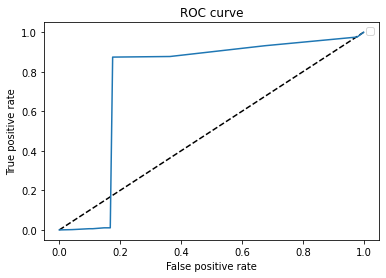

In [26]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)#, label='Keras (area = {:.3f})'.format(auc))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# tf.math.confusion_matrix(y_test, model_basic.predict(X_test))

model_basic.predict(X_test)[13].argmax()

In [ ]:
model_basic.summary()

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
# X_train.index.dtype
# train_i = list()
# test_i = list()

In [ ]:
# for train, test in kfold.split(X_train, y_train):
#   train_i.append(train)
#   test_i.append(test)

In [ ]:
# test_i[0]

In [ ]:
# test_i[1]

In [ ]:
# X_train.iloc[test_i[0].tolist(), :]

In [ ]:
fold_no = 1
acc_per_fold = list()
loss_per_fold = list()

for train, test in kfold.split(X_train, y_train):

  # Define the model architecture
  model_basic = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape = (2304, )),
      tf.keras.layers.Dense(2056, activation = 'relu'),
      tf.keras.layers.Dense(1028, activation = 'relu'),
      tf.keras.layers.Dense(512, activation = 'relu'),
      tf.keras.layers.Dense(256, activation = 'relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

  # Compile the model
  model_basic.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model_basic.fit(X_train.iloc[train, :], y_train.iloc[train, :],epochs=300)

  # Generate generalization metrics
  scores = model_basic.evaluate(X_train.iloc[test, :], y_train.iloc[test, :], verbose=0)
  print(f'Score for fold {fold_no}: {model_basic.metrics_names[0]} of {scores[0]}; {model_basic.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

In [ ]:
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
# tf.reshape(np.array(X_train), shape = (9690, 48, 48))

In [ ]:
model_basic_4000 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (2304, )),
    tf.keras.layers.Dense(2056, activation = 'relu'),
    tf.keras.layers.Dense(1028, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_basic_9000 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (2304, )),
    tf.keras.layers.Dense(2056, activation = 'relu'),
    tf.keras.layers.Dense(1028, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_basic_4000.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_basic_9000.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_basic_4000.fit(x=X_train_4000,y=y_train_4000,epochs=300)

model_basic_9000.fit(x=X_train_9000,y=y_train_9000,epochs=300)

In [ ]:
model_basic_4000.evaluate(X_test_4000,  y_test_4000, verbose=0)

In [ ]:
model_basic_9000.evaluate(X_test_9000,  y_test_9000, verbose=0)

In [ ]:
clf = Perceptron(tol=1e-3, random_state=0)
clf_4000 = Perceptron(tol=1e-3, random_state=0)
clf_9000 = Perceptron(tol=1e-3, random_state=0)

In [ ]:
clf.fit(X_train, y_train)
clf_4000.fit(X_train_4000, y_train_4000)
clf_9000.fit(X_train_9000, y_train_9000)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
clf_4000.score(X_test_4000, y_test_4000)

In [ ]:
clf_9000.score(X_test_9000, y_test_9000)

In [ ]:
%ls